## TASK3: Exploratory Data Analysis - Sample superstore
## Author: Ujwala Kokala

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset and print first 5rows.

df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [ ]:
# The dataset consists of 9994 rows and 13 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [5]:
# Five point summary
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# Drop unncessary columns from dataset.
df = df.drop('Postal Code', axis=1)

In [7]:
#checking for duplicates in the dataset
dupes = df.duplicated()
sum(dupes)

50

In [8]:
df.drop_duplicates(inplace=True) 

In [9]:
#checking for null values in the dataset
df.isnull().sum().sum()

0

In [10]:
df.shape

(9944, 12)

In [11]:
# Find value counts for categorical variables.

print(df["Ship Mode"].value_counts())
print(df.Segment.value_counts())
print(df.Country.value_counts())
print(df.City.value_counts())
print(df.State.value_counts())
print(df.Region.value_counts())
print(df.Category.value_counts())
print(df['Sub-Category'].value_counts())


Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64
Consumer       5160
Corporate      3008
Home Office    1776
Name: Segment, dtype: int64
United States    9944
Name: Country, dtype: int64
New York City     906
Los Angeles       734
Philadelphia      531
San Francisco     503
Seattle           424
                 ... 
Holyoke             1
Rogers              1
Citrus Heights      1
Yucaipa             1
Pico Rivera         1
Name: City, Length: 531, dtype: int64
California              1980
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  

In [12]:
# Drop country column as it has only one country i.e 'united states' 
df = df.drop('Country', axis=1)

## Exploratory data analysis
## Univariate analysis
## Categorical variables

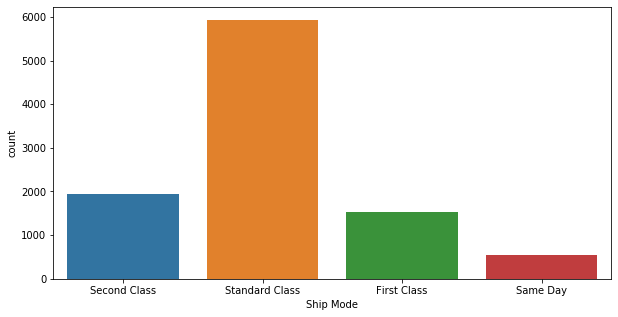

In [13]:
plt.figure(figsize=(10,5))

ax = sns.countplot(df['Ship Mode'])

# Insights:
In ship mode, we observe standard class is having highest count and same day is having least count.

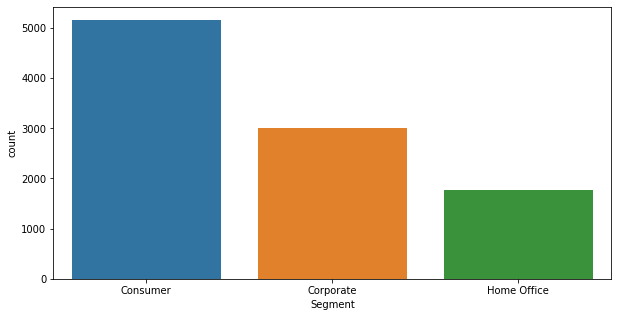

In [14]:
plt.figure(figsize=(10,5))

ax = sns.countplot(df['Segment'])

### we observe in segment, consumer is having highest count and home office is having least count.

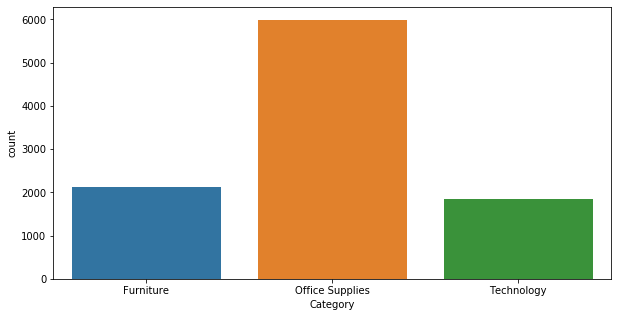

In [15]:
plt.figure(figsize=(10,5))

ax = sns.countplot(df['Category'])

### In category attribute, we see that office supplies are having highest count and furniture and technology are having almost same count.

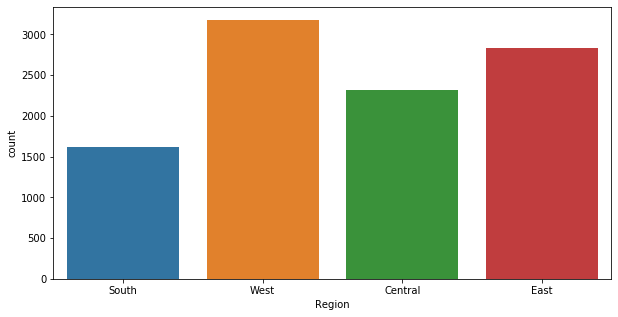

In [16]:
plt.figure(figsize=(10,5))

ax = sns.countplot(df['Region'])

### In Region attribute, west is having highest count and south is having least count.

## Bivariate Analysis


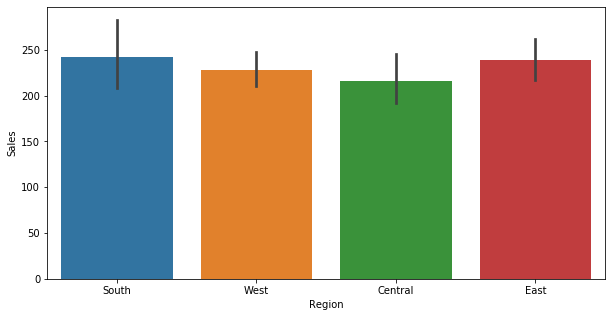

In [17]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x='Region', y='Sales', data=df)

### We obseve that south and east regions are having highest sales. Central region is having comparatively low sales.

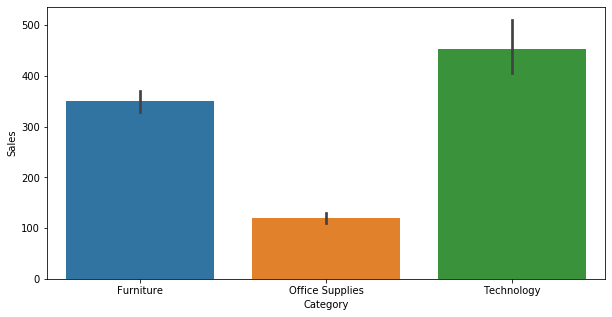

In [18]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x='Category', y='Sales', data=df)

### Technology category is having highest sales whereas office supplies category is having least sales. 
### So business manager should look into this weak region i.e, office supplies category to improve sales.

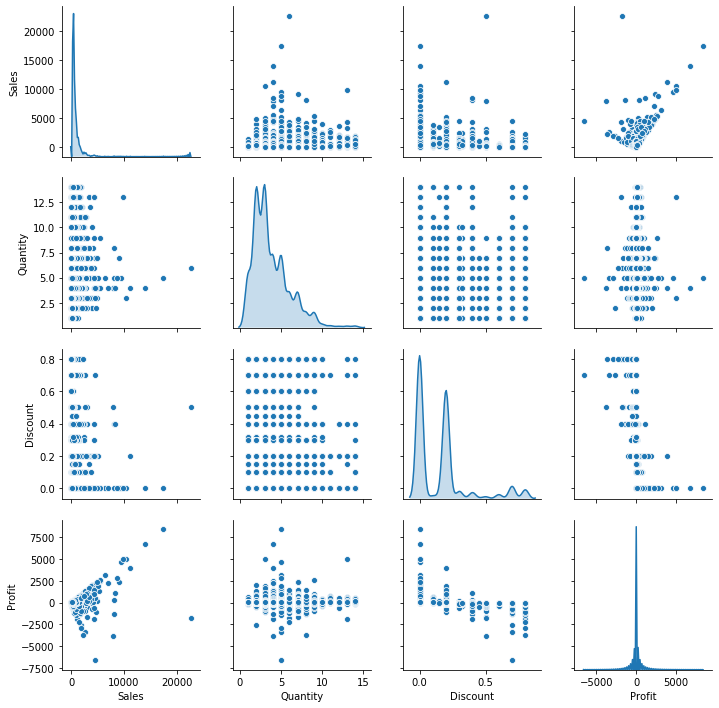

In [19]:
# Pairplot for dataset.
sns.pairplot(df, diag_kind='kde')

### This is highly skewed dataset. sales and profit arehaving positive correlation. 
### Whereas sales and discount are having negative correlation.

In [42]:
df.corr(method='pearson')

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


## Heatmap

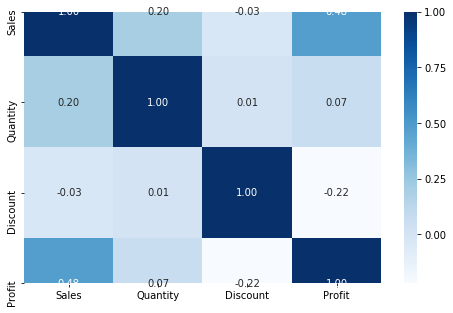

In [25]:
plt.subplots(figsize=(8,5))
sns.heatmap(df.corr(), annot=True,fmt='.2f',cmap='Blues')

# Box plot for finding outliers

(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

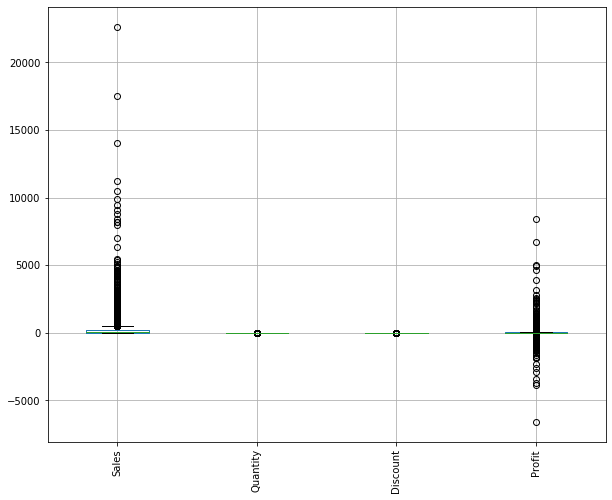

In [22]:
df.boxplot(figsize=(10,8))
plt.xticks(rotation=90)

### We observe lot of outliers present in sales and profit attributes. Few outliers are in quantity and discount attributes.

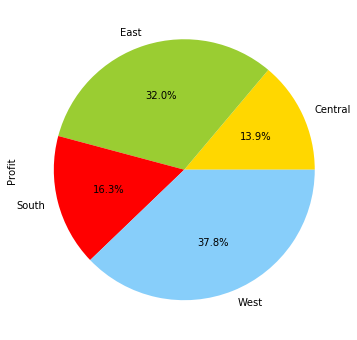

In [28]:
plt.figure(figsize =(8,6))
df.groupby(by ='Region')['Profit'].sum().plot(kind = 'pie',autopct='%1.1f%%',colors = ['gold', 'yellowgreen', 'red', 'lightskyblue'])
plt.show()

### From this above pie chart we see that, central region is having least profit and west region is having highest profits.
### Central and south regions should be concentrated to improve profits.

## Multivariate Analysis

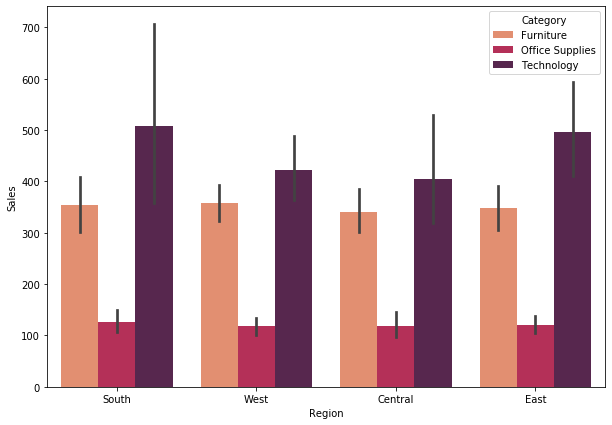

In [29]:
plt.figure(figsize=(10, 7))
sns.barplot(x="Region", y="Sales", hue="Category", data=df,palette="rocket_r")
plt.show()

### We can observe that South region is having highest sales for technolgy category followed by east region. Office supplies is having least sales.
### Office supplies and furniture are having almost same sales for every region.

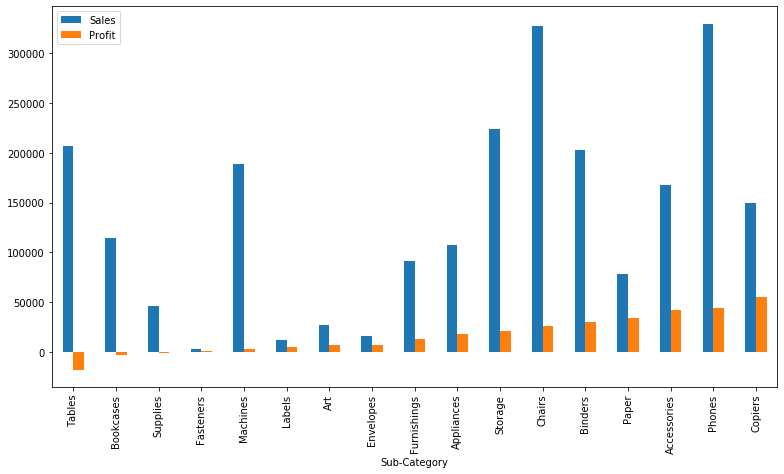

In [30]:
subcategory_grpby = df.groupby(by ='Sub-Category')[['Sales','Profit']].sum()
sort_profit = subcategory_grpby.sort_values(by = ['Profit'],ascending = True)
sort_profit.plot(kind = 'bar',figsize =(13,7))
plt.show()

### Sub-category chairs and phones are having highest sales. Copiers are having highest profit. Whereas tables, bookcases, supplies are in loss.

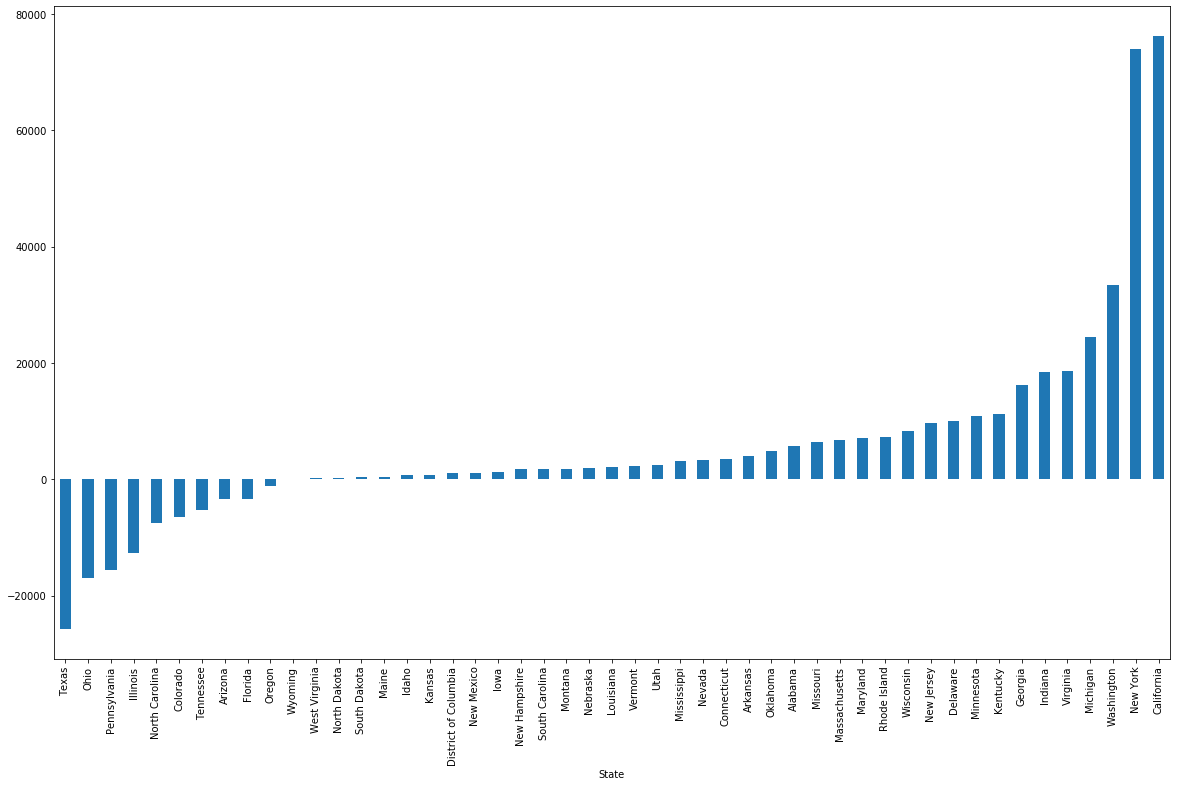

In [33]:
# State vs Profit
plt.figure(figsize =(20,12))
df.groupby(by ='State')['Profit'].sum().sort_values(ascending = True).plot(kind = 'bar')
plt.show()

### California is having highest profit followed by New York city. Whereas Texas is having highest loss followed by Ohio, Pennsylvania, Illinois,.. upto Oregon are in loss.

Text(0.5, 1.0, 'Discount VS Sales')

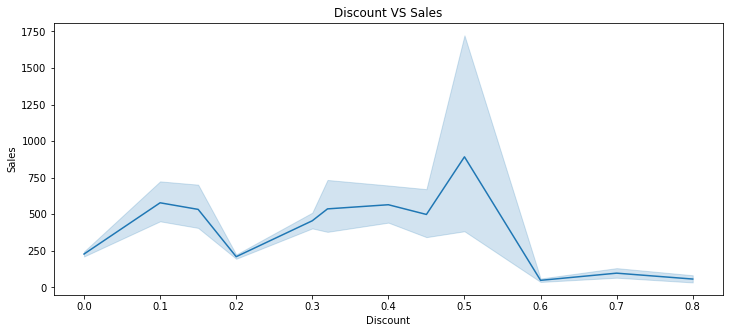

In [37]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Discount',y='Sales',data=df)
plt.title('Discount VS Sales')

###  For least discount and highest discount sales are low. whereas for medium discount the sales are high.

Text(0.5, 1.0, 'Discount and Profit')

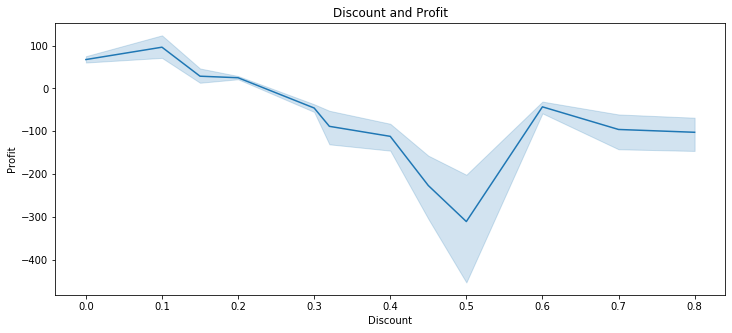

In [36]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Discount',y='Profit',data=df)
plt.title("Discount and Profit")

### Profit and Discount are having negative correlation.